# Data Science analysis for Web3 Trading  
![Market Sentiment](C:/Users/sivar/OneDrive/Desktop/download%20(1).jpg)


In [59]:
import pandas as pd 
import numpy as np


# Load data

In [60]:

historical_df = pd.read_csv(r"C:\Users\sivar\Downloads\historical_data (1).csv")
sentiment_df = pd.read_csv(r"C:\Users\sivar\Downloads\fear_greed_index.csv")


# Convert historical timestamp from milliseconds to datetime

In [61]:

historical_df["Timestamp"] = pd.to_datetime(historical_df["Timestamp"], unit='ms')
historical_df["date_only"] = historical_df["Timestamp"].dt.date



# Convert sentiment 'date' to datetime

In [62]:

sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
sentiment_df["date_only"] = sentiment_df["date"].dt.date

# Merge both datasets on 'date_only'

In [63]:
merged_df = pd.merge(historical_df, sentiment_df, on="date_only", how="inner")


# Display info

In [64]:


print("Historical Data Shape:", historical_df.shape)
print("Sentiment Data Shape:", sentiment_df.shape)
print("Merged Data Shape:", merged_df.shape)
print("Unique Classifications:", sentiment_df["classification"].unique())
print("Historical Date Range:", historical_df["date_only"].min(), "to", historical_df["date_only"].max())
print("Sentiment Date Range:", sentiment_df["date_only"].min(), "to", sentiment_df["date_only"].max())
print("Merged Date Range:", merged_df["date_only"].min(), "to", merged_df["date_only"].max())


Historical Data Shape: (211224, 17)
Sentiment Data Shape: (2644, 5)
Merged Data Shape: (184263, 21)
Unique Classifications: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
Historical Date Range: 2023-03-28 to 2025-06-15
Sentiment Date Range: 2018-02-01 to 2025-05-02
Merged Date Range: 2023-03-28 to 2025-02-19


In [65]:
merged_df.tail(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,timestamp,value,classification,date
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.13,551.77,BUY,18-04-2025 20:03,-1797.88,Close Short,-82.883731,...,87333347541,False,0.055176,6.900000e+14,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,7.50,1002.00,BUY,18-04-2025 20:03,-1793.75,Close Short,-150.515250,...,87333347541,False,0.100200,6.610000e+13,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,3.93,525.05,BUY,18-04-2025 20:03,-1786.25,Close Short,-78.869991,...,87333347541,False,0.052504,1.010000e+15,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,4.34,579.82,BUY,18-04-2025 20:03,-1782.32,Close Short,-87.098158,...,87333347541,False,0.057982,2.700000e+13,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184262,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6,1777.98,237538.13,BUY,18-04-2025 20:03,-1777.98,Close Short,-35681.747230,...,87333347541,False,23.753812,4.030000e+14,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19


# Save merged DataFrame to CSV

In [ ]:
merged_df.to_csv('web3_trading_signals_merged.csv', index=False)

# Pie Chart: Sentiment Proportions

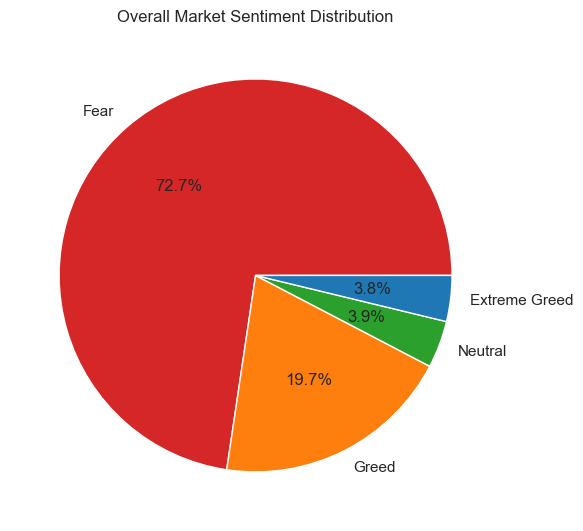

In [67]:
plt.figure(figsize=(6, 6))
merged_df["classification"].value_counts().plot.pie(
    autopct='%1.1f%%', colors=["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4", "#9467bd"]
)
plt.title("Overall Market Sentiment Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Total Trade Volume by Weekday and Sentiment

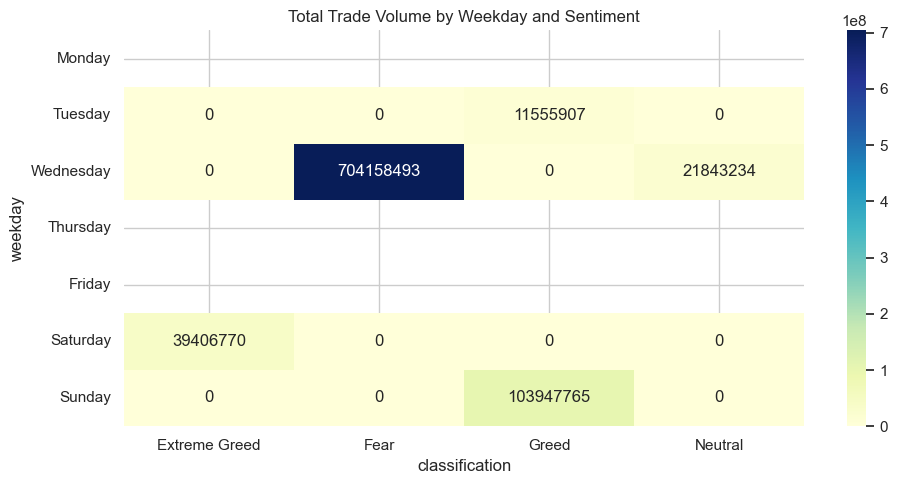

In [68]:
merged_df["weekday"] = pd.to_datetime(merged_df["date_only"]).dt.day_name()
volume_by_day = merged_df.groupby(["weekday", "classification"])["Size USD"].sum().unstack().fillna(0)

# Order days
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
volume_by_day = volume_by_day.reindex(ordered_days)

plt.figure(figsize=(10, 5))
sns.heatmap(volume_by_day, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Trade Volume by Weekday and Sentiment")
plt.tight_layout()
plt.show()


# Daily Trade Volume (USD)

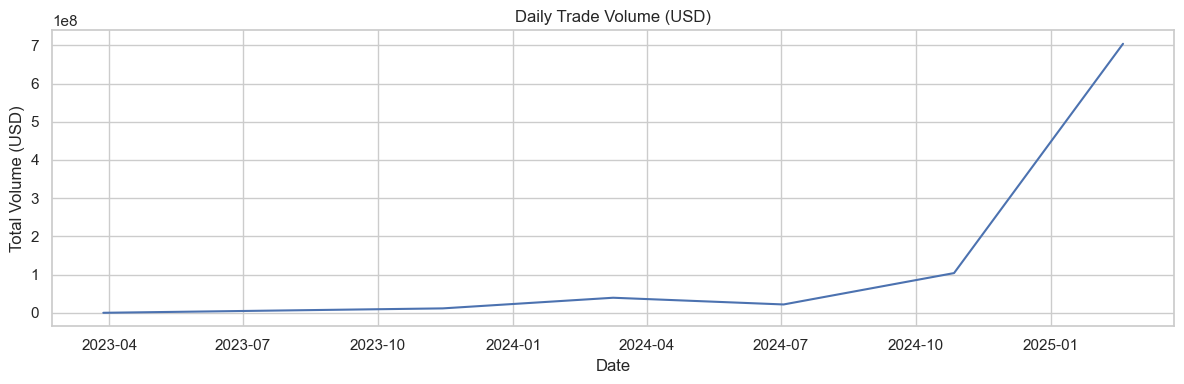

In [69]:

daily_volume = merged_df.groupby("date_only")["Size USD"].sum()
plt.figure(figsize=(12, 4))
daily_volume.plot(title="Daily Trade Volume (USD)")
plt.xlabel("Date")
plt.ylabel("Total Volume (USD)")
plt.tight_layout()
plt.show()



# Distribution of Leverage

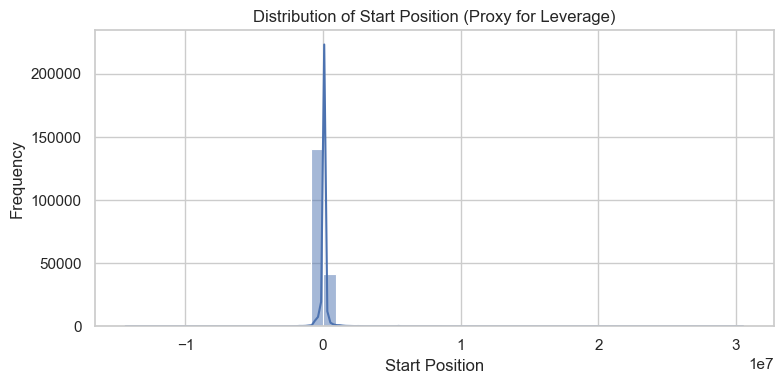

In [70]:
plt.figure(figsize=(8, 4))
sns.histplot(merged_df["Start Position"], bins=50, kde=True)
plt.title("Distribution of Start Position (Proxy for Leverage)")
plt.xlabel("Start Position")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Closed PnL vs Sentiment

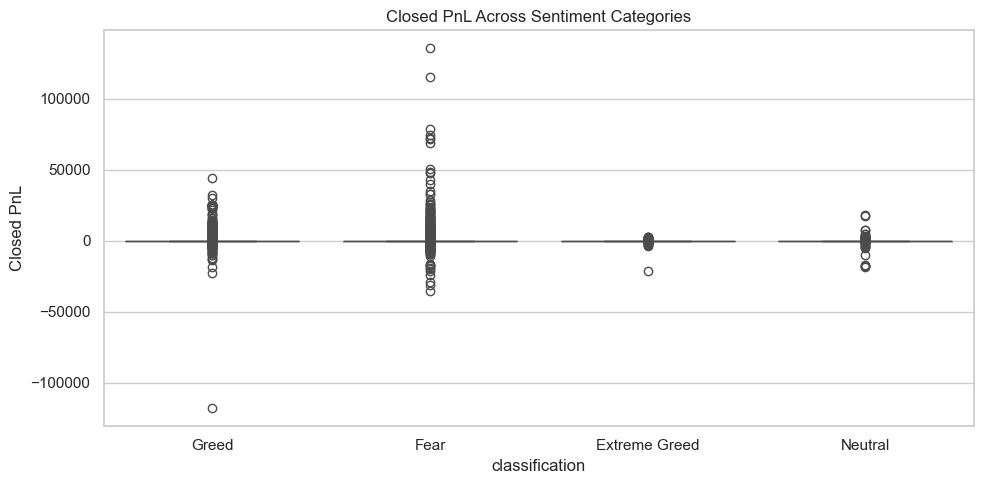

In [71]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL")
plt.title("Closed PnL Across Sentiment Categories")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.show()

# Average Trade Size by Sentiment

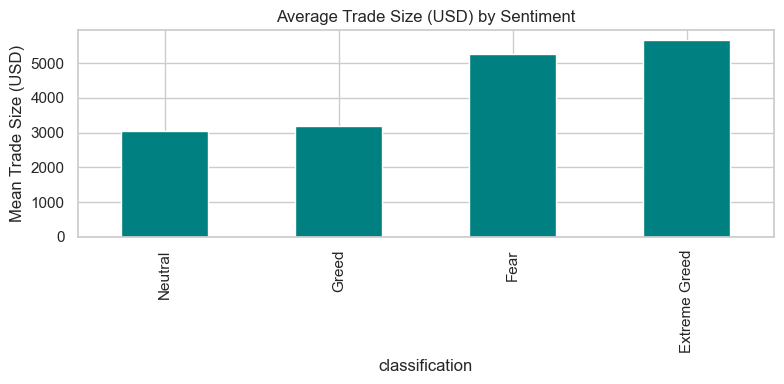

In [72]:
avg_size_by_sentiment = merged_df.groupby("classification")["Size USD"].mean().sort_values()

plt.figure(figsize=(8, 4))
avg_size_by_sentiment.plot(kind="bar", color="teal")
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("Mean Trade Size (USD)")
plt.tight_layout()
plt.show()

# Correlation Heatmap

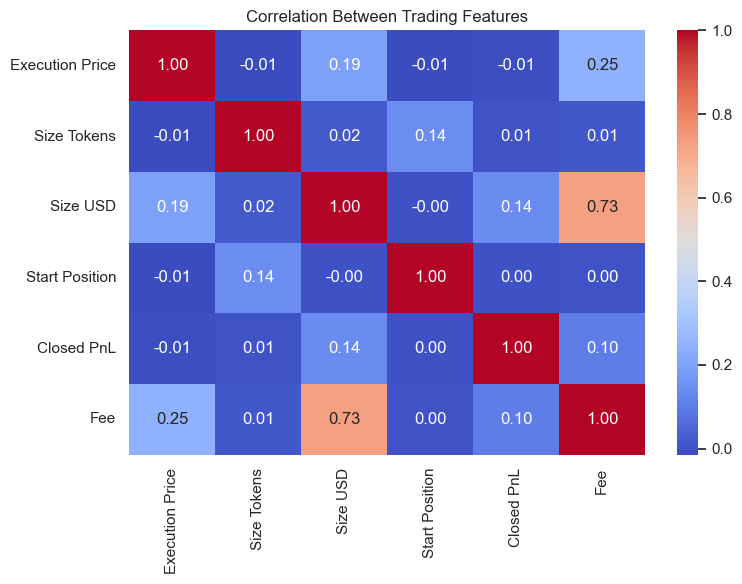

In [73]:
corr_cols = ["Execution Price", "Size Tokens", "Size USD", "Start Position", "Closed PnL", "Fee"]
corr = merged_df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Trading Features")
plt.tight_layout()
plt.show()

# Average Closed PnL Over Time by Sentiment

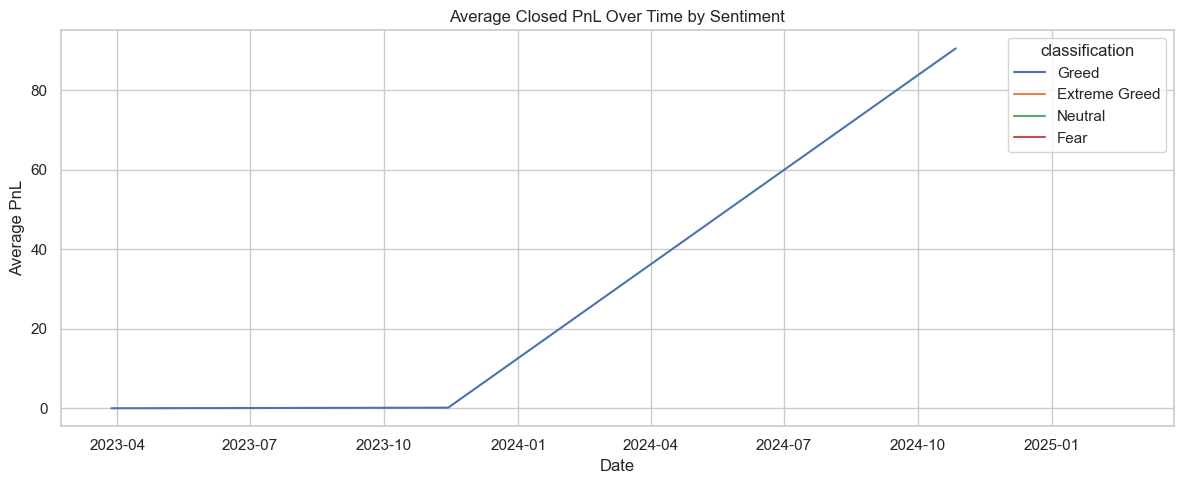

In [74]:
daily_avg_pnl = merged_df.groupby(["date_only", "classification"])["Closed PnL"].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_avg_pnl, x="date_only", y="Closed PnL", hue="classification")
plt.title("Average Closed PnL Over Time by Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


# Trade count by market sentiment

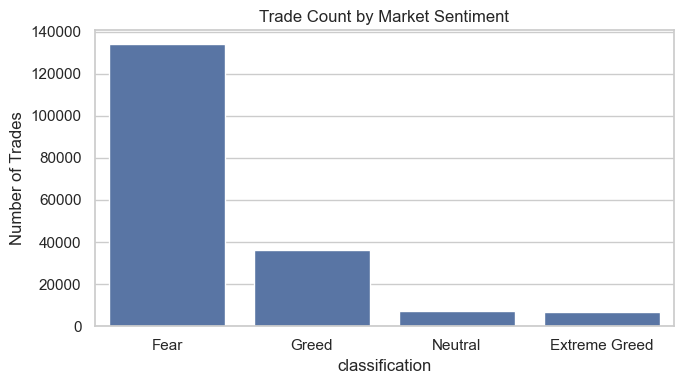

In [75]:
plt.figure(figsize=(7, 4))
sns.countplot(data=merged_df, x="classification", order=merged_df["classification"].value_counts().index)
plt.title("Trade Count by Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()


# Profitability Analysis

In [76]:
pnl_summary = merged_df.groupby("classification")["Closed PnL"].agg(["mean", "median", "std", "count"])
print("PnL Summary by Sentiment:\n", pnl_summary)

PnL Summary by Sentiment:
                      mean  median          std   count
classification                                        
Extreme Greed   25.418772     0.0   306.166937    6962
Fear            50.047622     0.0   909.121796  133871
Greed           87.894859     0.0  1148.343968   36289
Neutral         22.229713     0.0   633.704815    7141


# High Leverage Behavior

<function matplotlib.pyplot.show(close=None, block=None)>

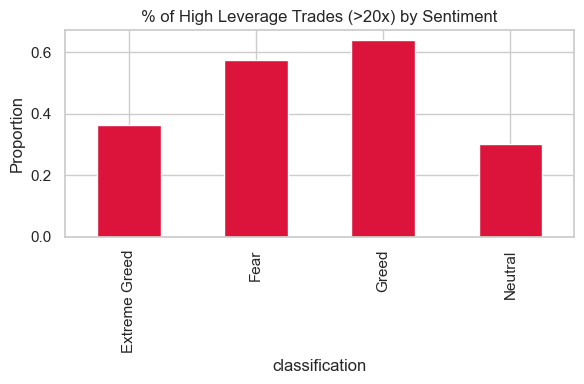

In [77]:
merged_df["high_leverage"] = merged_df["Start Position"] > 20
hl_counts = merged_df.groupby("classification")["high_leverage"].mean()

plt.figure(figsize=(6, 4))
hl_counts.plot(kind="bar", color="crimson")
plt.title("% of High Leverage Trades (>20x) by Sentiment")
plt.ylabel("Proportion")
plt.tight_layout()

plt.show


# Signal: Trade Volume Spike Detection

In [78]:
daily_volumes = merged_df.groupby("date_only")["Size USD"].sum()
volume_mean = daily_volumes.mean()
volume_std = daily_volumes.std()
spikes = daily_volumes[daily_volumes > volume_mean + 2 * volume_std]
print("\nVolume Spikes Detected (Mean + 2*STD threshold):\n")
print(spikes)


Volume Spikes Detected (Mean + 2*STD threshold):

date_only
2025-02-19    7.041585e+08
Name: Size USD, dtype: float64
